<a id="toc"></a>

# <u>Table of Contents</u>

1.) [Imports](#imports)  
2) [Pollutants](#pollutants)  
&nbsp;&nbsp;&nbsp;&nbsp; 2.1.) [Missing values](#poll_nan)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.2.) [General location](#poll_gen_loc)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.3.) [Specific location](#poll_spec_loc)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.4.) [Matrix](#poll_matrix)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.5.) [Method](#poll_method)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.6.) [Study Name](#poll_study)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.7.) [Parameter](#poll_param)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.8.) [NST Site](#poll_nst_site)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.9.) [Fiscal Year ](#fiscal)   
3.) [Sites](#sites)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.1.) [Missing values](#site_nan)   
&nbsp;&nbsp;&nbsp;&nbsp; 3.2.) [Study Name](#sites_study_name)   
&nbsp;&nbsp;&nbsp;&nbsp; 3.3.) [Source File](#site_source_file)   
&nbsp;&nbsp;&nbsp;&nbsp; 3.4.) [NST Site](#site_nst)   
&nbsp;&nbsp;&nbsp;&nbsp; 3.5.) [General Location](#site_gen_loc)   
4.) [Histopaths](#histopaths)  
&nbsp;&nbsp;&nbsp;&nbsp; 4.1.) [Data Processsing](#hist_process)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.2.) [Quick Overview](#hist_overview)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.3.) [Missing values](#hist_nan)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.4.) [General features](#hist_gen_feats)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.5.) [Location](#hist_loc)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.6.) [NST Site](#hist_nst_site)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.7.) [Gonadal](#hist_gonadal)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.8.) [Dermo](#hist_dermo)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.9.) [Correlation plot](#hist_corr)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.10.) [Volume](#hist_vol)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.11.) [Size](#hist_size)   
5.) [References](#references)  
6.) [Further Reading](#further_reading)  

---
<a id="imports"></a>

# [^](#toc)<u>Imports</u>

In [12]:
### Standard imports
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50

# Will count number of unique words in a sentence
from collections import Counter

### Standard plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Progress bar
from tqdm import tqdm

### Fancy plot of Earth (This library is really cool and fast!)
import folium
from folium.plugins import MarkerCluster

### Advanced plotting import
# Altair
import altair as alt
alt.renderers.enable('notebook')
# Plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

# Helps visualize wordy features
from wordcloud import WordCloud

### Removes warnings from output
import warnings
warnings.filterwarnings('ignore')

DATA_PATH = "../../data/mussel/"

### Styling helpers

In [13]:
# A short hand way to plot most bar graphs
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    
    # Plots the data
    fig = sns.barplot(data.values, data.index, ax=ax)
    
    # Places text for each value in data
    for i, v in enumerate(data.values):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=14)
        else:
            ax.text(0, i, round(v, 3), color='k', fontsize=14)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Definitions

[Bivalves](https://en.wikipedia.org/wiki/Bivalvia) - A class of mollusc whos body is encloses by a two part shell.  Common examples are clams, oysters, cockles, mussels, and scallops

# Background

Mussel Watch is a ...


### Why Mussels?

Other species are looked at as well such as coral.  10% of coral reefs have disappeared 

Monitoring mussel heath is an indirect way of monitoring water quaility.  This is because mussels.  In addition bivalves and contain Calcium carbonate

Bivalves are filter-feeders, but they are also filters

In [8]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/DxEpyjWDB6I" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

### Where is this?

As we will see when we start looking at the data, Mussel Watch is nearly everywhere in the United States and is fairly comprehensive

#### Mussel Watch Sites in the Great Lakes region
<img style="float:left; width:450px" alt="Great Lakes Mussel Watch Sites" src="http://www.regions.noaa.gov/great-lakes/wp-content/uploads/2012/10/MWP.jpg"/>

### Calcium carbonate

The protagonist of this dataset is not Mussels or 

The central figure in this story is Calcium Carbonate.  This is the exoskeleton in clams, 

<img style="width:400px; float:left" alt="Calcium Carbonate" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Calcium_carbonate_structure.svg/1280px-Calcium_carbonate_structure.svg.png"/>

---
<a id="pollutants"></a>

# [^](#toc) <u>Pollutants</u>

In [30]:
pollutants = pd.read_csv(DATA_PATH + "pollutants.csv")
print("Shape of pollutants data:", pollutants.shape)

num_cols = [col for col in pollutants.columns if pollutants[col].dtype != object]
cat_cols = [col for col in pollutants.columns if pollutants[col].dtype == object]

print("\n{}Numeric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_cols))

print("\n{}Categoric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_cols))

pollutants.head()

Shape of pollutants data: (769926, 22)

Numeric columns:
fiscal_year --- latitude --- longitude --- result

Categoric columns:
coastal_ecological_area --- collection_date --- general_location --- matrix --- method --- nst_sample_id --- nst_site --- parameter --- parameter_name --- qualifier --- region_name --- scientific_name --- source_file --- specific_location --- state_name --- stratum --- study_name --- units


coastal_ecological_area         collection_date  fiscal_year  \
0                     NaN  18AUG2015:00:00:00.000       2015.0   
1                     NaN  18AUG2015:00:00:00.000       2015.0   
2                     NaN  18AUG2015:00:00:00.000       2015.0   
3                     NaN  18AUG2015:00:00:00.000       2015.0   
4                     NaN  18AUG2015:00:00:00.000       2015.0   

  general_location  latitude  longitude    matrix       method  \
0      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   
1      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   
2      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   
3      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   
4      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   

          nst_sample_id    nst_site                   parameter  \
0  BA2015AKC-15-005bSED  AKC_15-005  1,6,7-Trimethylnaphthalene   
1  BA2015AKC-15-005bSED  AKC_15-005    1-Methyldibenzothiophene   
2  BA2015AKC-15-005bSED  AKC_15-005            1-Methylfluorene   
3  BA2015AKC-15-005bSED  AKC_15-005         1-Methylnaphthalene   
4  BA2015AKC-15-005bSED  AKC_15-005        1-Methylphenanthrene   

  parameter_name      qualifier region_name  result scientific_name  \
0            NaN  Below the MDL         NaN   0.104        Sediment   
1            NaN  Below the MDL         NaN   0.038        Sediment   
2            NaN            NaN         NaN   0.447        Sediment   
3            NaN            NaN         NaN   0.595        Sediment   
4            NaN            NaN         NaN   0.460        Sediment   

                               source_file specific_location state_name  \
0  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   
1  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   
2  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   
3  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   
4  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   

  stratum           study_name     units  
0     NaN  Alaska Arctic Study  ng/dry g  
1     NaN  Alaska Arctic Study  ng/dry g  
2     NaN  Alaska Arctic Study  ng/dry g  
3     NaN  Alaska Arctic Study  ng/dry g  
4     NaN  Alaska Arctic Study  ng/dry g

<a id="poll_nan"></a>

### [^](#toc) Missing values

In [31]:
missing_cols = pollutants.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].index

temp = pd.DataFrame(pollutants[missing_cols].isnull().sum()).reset_index()
temp.columns = ["Feature", "Number Missing"]

temp

Feature  Number Missing
0   coastal_ecological_area          769562
1           collection_date           94935
2               fiscal_year             364
3          general_location               3
4                  latitude          769562
5                 longitude          769562
6                    matrix             364
7                    method            6654
8             nst_sample_id             364
9                 parameter            1100
10           parameter_name          769190
11                qualifier          447502
12              region_name          769562
13                   result             364
14          scientific_name             364
15        specific_location               3
16               state_name          769562
17                  stratum          769592
18                    units             364

### Missing values in location (general and specific)

Nice general and specifica are missing from the same rows.  I can probably delete these two rows since they don't seem to contain any information

In [5]:
pollutants[(pollutants.general_location.isnull()) | (pollutants.specific_location.isnull())]

coastal_ecological_area collection_date  fiscal_year  \
7761  Alaska South Central - Cook Inlet             NaN          NaN   
7780  Alaska South Central - Cook Inlet             NaN          NaN   
7790  Alaska South Central - Cook Inlet             NaN          NaN   

     general_location  latitude  longitude matrix method nst_sample_id  \
7761              NaN  59.20715 -151.81512    NaN    NaN           NaN   
7780              NaN  59.46741 -151.53439    NaN    NaN           NaN   
7790              NaN  59.42355 -151.31118    NaN    NaN           NaN   

      nst_site parameter parameter_name qualifier region_name  result  \
7761      CICB       NaN            NaN       NaN      Alaska     NaN   
7780  KB2_KJ-2       NaN            NaN       NaN      Alaska     NaN   
7790      KBTB       NaN            NaN       NaN      Alaska     NaN   

     scientific_name                          source_file specific_location  \
7761             NaN  Sites_KachemakBayBioeffects2009.csv               NaN   
7780             NaN  Sites_KachemakBayBioeffects2009.csv               NaN   
7790             NaN  Sites_KachemakBayBioeffects2009.csv               NaN   

     state_name stratum               study_name units  
7761     Alaska     NaN  Kachemak Bay Bioeffects   NaN  
7780     Alaska     NaN  Kachemak Bay Bioeffects   NaN  
7790     Alaska     NaN  Kachemak Bay Bioeffects   NaN

### Distribution of sites

In [32]:
locations = [("Alaska, US", [59.7, -152.5]), ("Washington, US", [48.2, -123])]

# Zoom in on which location
location  = locations[1]

In [34]:
m = folium.Map(location=location[1], zoom_start=8)

marker_cluster = MarkerCluster().add_to(m)

for key, group in pollutants.groupby("specific_location"):
    lat = group["latitude"].mean()
    lon = group["longitude"].mean()
#     area = group["coastal_ecological_area"].mode()
    if np.isnan(lat):
        continue
    for nst_site in group[["nst_site"]].values:    
        folium.Marker(
            location=[lat, lon],
            popup="{} - {}".format(nst_site, nst_site),
            icon=folium.Icon(color='green', icon='ok-sign'),
        ).add_to(marker_cluster)
        break
        
m

### Fill in location missing values

The same locations 

In [10]:
cols = ["general_location", "specific_location"]
pollutants[cols] = pollutants[cols].fillna("Location unknown")

<a id="poll_gen_loc"></a>

### [^](#toc) General location

There's a lot of activity happening in Kachemak Bay, Alaska.  "Kachemak" has one interpretation of meaning "Smokey" in Aleut. It is interesting to note that Kachemak Bay National Estuarine Research Reserve is the largest reserve in the National Estuarine Research Reserve System.

#### Geography of Kachemak Bay

<img style="height:300px; float:left" alt="Kachemak Bay Geography" src="https://i.pinimg.com/736x/51/8d/ac/518dacda995a13ad74a1b3faaf57e3a5.jpg"/>

#### Kachemak Bay's beautiful!

<img style="height:300px; float:left" alt="Kachemak Bay" src="https://s3.amazonaws.com/gs-geo-images/6dd7fbb9-d633-42f9-81e1-ff840232f801_l.jpg"/>

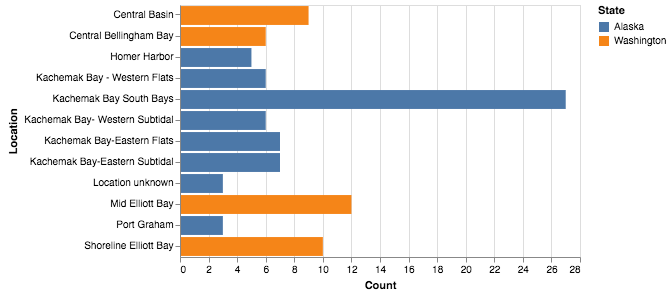

In [11]:
temp = (pollutants
        .groupby("state_name")
        .general_location
        .value_counts()
        .head(12)
        .rename(columns={"general_location": "Count"}))
temp = pd.DataFrame(temp).reset_index()
temp.columns = ["State", "Location", "Count"]

alt.Chart(temp).mark_bar().encode(
    x='Count',
    y='Location',
    color="State"
)

<a id="poll_spec_loc"></a>

### [^](#toc) Specific location

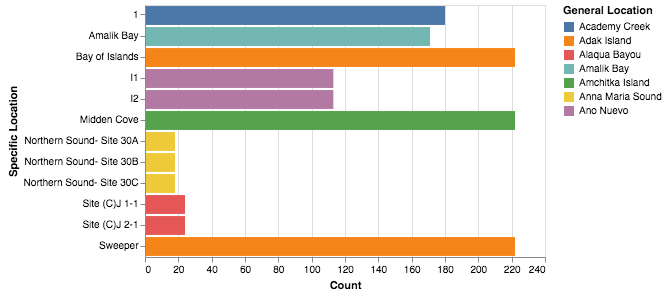

In [15]:
temp = (pollutants
        .groupby("general_location")
        .specific_location
        .value_counts()
        .head(12)
        .rename(columns={"specific_location": "Count"}))
temp = pd.DataFrame(temp).reset_index()
temp.columns = ["General Location", "Specific Location", "Count"]

alt.Chart(temp).mark_bar().encode(
    x='Count',
    y='Specific Location',
    color="General Location"
)

### [^](#toc) <u>Bivalves</u>

Bivalves are ...

#### Oysters

Crassostrea virginica is a fancy name for the [Eastern oyster](https://en.wikipedia.org/wiki/Eastern_oyster).  Ostrea sandvicensis is another type of ostyer.  The photo below are different varities of ostyer since I can't find any photos of Ostrea sandvicensis.

<img style="height:300px; float:left" src="https://3.bp.blogspot.com/-8ZzXW0EsH0k/V7ZiLV2I9QI/AAAAAAAAAA4/3ZFtV35X6BIF8d4rgjm-qT14tBtyiEGMQCLcB/s1600/pigalle%2Boyster.jpg"/>

#### Mussel

[Mytilus edulis](https://en.wikipedia.org/wiki/Blue_mussel) (right) also known as the "blue mussel" or "common mussel" and [Dreissena](https://en.wikipedia.org/wiki/Dreissena) (right) are both genus the hard shelled <strong>mussel</strong>!

<img style="height:300px; float:left" alt="Mytilus edulis" src="https://upload.wikimedia.org/wikipedia/commons/3/32/Blue_mussel_Mytilus_edulis.jpg"/>
<img style="height:300px; float:right" alt="Dreissena" src="https://nas.er.usgs.gov/taxgroup/mollusks/images/zebra4b.jpg"/>

#### Conch

[Strombus gigas](https://en.wikipedia.org/wiki/Lobatus_gigas) is the Queen conch

<img style="width:300px; float:left" src="http://www.jaxshells.org/chbo.jpg"/>

#### Clam

[Clinocardium nuttallii](https://en.wikipedia.org/wiki/Clinocardium_nuttallii) is a type of clam

<img style="width:300px; float:left" src="http://www.centralcoastbiodiversity.org/uploads/1/4/9/9/14993002/3934812_orig.jpg"/>

#### Coral

[Porites astreoides](https://en.wikipedia.org/wiki/Porites_astreoides) (left) and [Pocillopora damicornis](https://en.wikipedia.org/wiki/Pocillopora_damicornis) (right) are different types of coral.

<img style="height:300px; float:left" src="http://commondatastorage.googleapis.com/aimscoral/images/largest/0603_C1_01.jpg"/>
<img style="height:300px; float:right" src="http://commondatastorage.googleapis.com/aimscoral/images/largest/0307_C1_09.jpg"/>

#### Sea Urchin

[Arbacia punctulata](https://en.wikipedia.org/wiki/Arbacia_punctulata) are sea urchins

<img style="width:300px; float:left" src="http://www.globalspecies.org/images/a/Arbacia_punctulata_1.jpg"/>

### [^](#toc) <u>Fish</u>

[Lutjanus griseus](https://en.wikipedia.org/wiki/Mangrove_snapper) (also know as the Mangrove snapper)

<img style="width:300px; float:left" src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Grey_snapper_-_Lutjanus_griseus.jpg"/>

[Pleuronectes americanus](https://en.wikipedia.org/wiki/Winter_flounder) is the winter flounder

<img style="width:300px; float:left" src="http://brick.shorebeat.com/wp-content/uploads/2015/03/winter_flounder.jpg"/>

[Diapterus auratus](https://en.wikipedia.org/wiki/Diapterus) is a type of fish appearing on both coasts of the Americas

<img style="width:300px; float:left" src="http://www.fishesoftexas.org/media/attachments/taxa/images/web/9121.jpg"/>

### [^](#toc) <u>Misc</u>

Not sure what [Ampelisca abdita](http://www.marinespecies.org/aphia.php?p=taxdetails&id=158020) is actually, but here's a picture

<img style="float:left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Ampelisca_brevicornis.jpg/250px-Ampelisca_brevicornis.jpg"/>

[Vibrio fischeri](https://en.wikipedia.org/wiki/Aliivibrio_fischeri) is a type of bacteria and they are know for their bioluminescence!

<img style="width:300px; float:left" src="https://c1.staticflickr.com/3/2330/2201737021_0a70f02d87.jpg"/>

### Limit scope

There is so much data in this dataset!  I'm going to group a few of the species together and discard everything else

In [59]:
### Mullusk
oysters  = {"Crassostrea virginica", "Ostrea sandvicensis", "Crassostrea rhizophorae",
           "Isognomon alatus", "Crassostrea corteziensis"}

clams    = {"Clinocardium nuttallii", "Mya Arenaria", "Anadara tuberculosa",
           "Protothaca staminea", "Anadara similis", "mytella guyanensis",
           "Donax denticulatus", "Siliqua Patula", "Corbicula fluminea",
           "Protothaca grata", "Mytella falcata", "Ctenoides scabra", "Chama sinuosa"}

mussels  = {"Mytilus species", "Mytilus edulis", "Dreissena", "Perumytilus purpuratus",
           "Aulacomya ater", "Perna Perna", "Semimytilus algosus", "Mytilus platensis",
           "Bracchidonies rodrigezii", "Choromytilus chorus", "Geukensia demissa"}

conch    = {"Strombus gigas"}

coral    = {"Pocillopora damicornis", "Porites astreoides"}
            
urchin   = {"Arbacia punctulata"}

### Fish
flounder = {"Pleuronectes americanus", "Platichthys stellatus", "Flatfish"}

fish     = {"Lutjanus griseus", "Diapterus auratus", "Osmerus mordax",
            "Diplodus argenteus", "Hexagrammos decagrammus", "Shrimp", "Starfish"}

salmon   = {"Oncorhynchus keta", "Oncorhynchus nerka"}

### Misc            
misc     = {"Ampelisca abdita", "Vibrio fischeri",
            
            # double check these
           "Eohaustorius estuarius", "Panulirus argus"}


### Sediment          
sediment = {"Sediment", "Surface Sediment"}
            

# maybe coral? and urchin?
mullusk  = set.union(oysters, clams, mussels, conch, coral, urchin)

all_fish = set.union(flounder, fish, salmon)

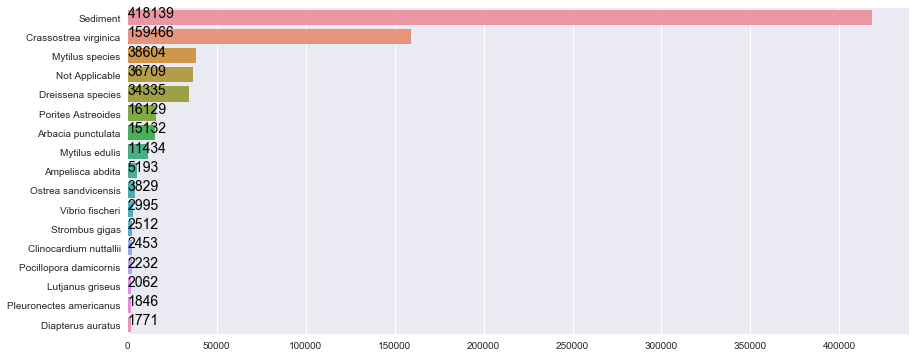

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

pretty_bar(pollutants.scientific_name.value_counts().head(17), ax)

In [55]:
pollutants.scientific_name.value_counts()

Sediment                    418139
Crassostrea virginica       159466
Mytilus species              38604
Not Applicable               36709
Dreissena species            34335
Porites Astreoides           16129
Arbacia punctulata           15132
Mytilus edulis               11434
Ampelisca abdita              5193
Ostrea sandvicensis           3829
Vibrio fischeri               2995
Strombus gigas                2512
Clinocardium nuttallii        2453
Pocillopora damicornis        2232
Lutjanus griseus              2062
Pleuronectes americanus       1846
Diapterus auratus             1771
Mya Arenaria                  1577
Platichthys stellatus         1249
Oncorhynchus keta             1152
Oncorhynchus nerka            1152
Osmerus mordax                 821
Anadara tuberculosa            594
Diplodus argenteus             592
Starfish                       535
Perumytilus purpuratus         456
Aulacomya ater                 454
Protothaca staminea            449
Crassostrea rhizopho

### Method and Parameter

Parameter - "Full name of the parameter"

Method - "The method used to analyze the parameter"

In [9]:
(pollutants.parameter + " - " + pollutants.method).value_counts().head()

Benzo[a]pyrene - GCMS            2813
Dibenzo[a,h]anthracene - GCMS    2809
Benz[a]anthracene - GCMS         2809
Benzo[e]pyrene - GCMS            2808
Anthracene - GCMS                2808
dtype: int64

<a id="poll_matrix"></a>

### [^](#toc) Matrix

In [16]:
temp = pollutants.matrix.value_counts()
trace = go.Bar(x = temp.index, y = temp.values, opacity = 0.3)

layout = go.Layout(title = 'Matrix Distribution')

fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

<a id="poll_study"></a>

### [^](#toc) Study Name

"The study for which the given record was collected. "

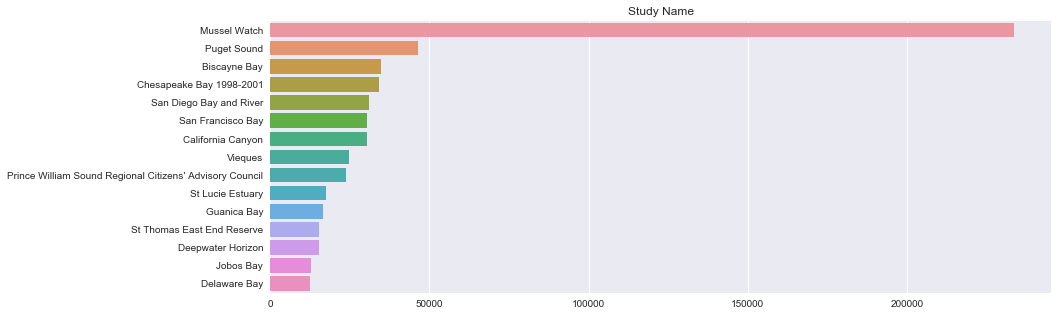

In [17]:
plt.figure(figsize=(14, 5))
temp = pollutants.study_name.value_counts().head(15)
_ = sns.barplot(temp.values, temp.index).set(title="Study Name")

<a id="poll_param"></a>

### [^](#toc) Parameter

parameter_name does not seem to have much useful information, partly giving information already expressed here

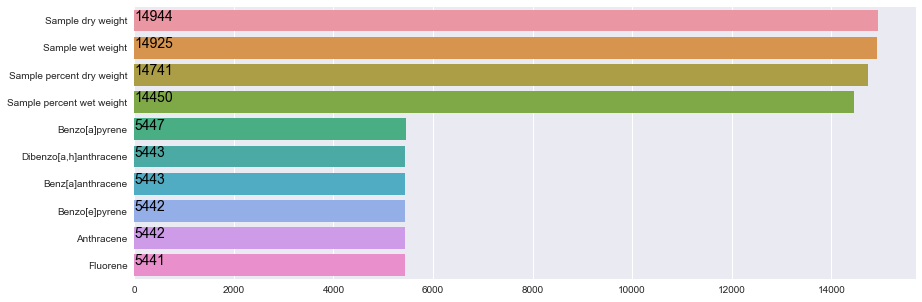

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
temp = pollutants.parameter.value_counts().head(10)
pretty_bar(temp, ax)

<a id="poll_nst_site"></a>

### [^](#toc) NST Site

"A character code that defines the NS&T sampling site name. Codes are generally defined by the site's general and specific location."

There are 3939 unique values


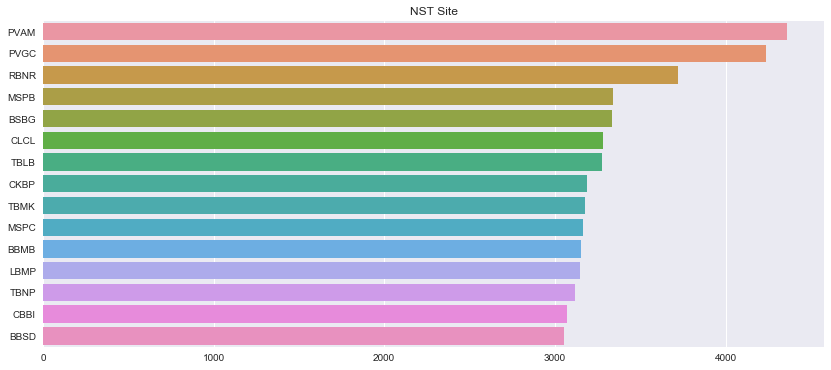

In [19]:
plt.figure(figsize=(14, 6))
temp = pollutants.nst_site.value_counts()
print("There are {}{}{} unique values".format(color.BOLD, len(temp), color.END))
_ = sns.barplot(temp.head(15).values, temp.head(15).index).set(title="NST Site")

<a id="fiscal"></a>

### [^](#toc) Fiscal Year 

In [43]:
temp = pollutants.fiscal_year.value_counts().sort_index()

trace = go.Scatter(
        x=temp.index,
        y=temp.values,
        mode='lines+marker'
    )

layout = go.Layout(
    xaxis=dict(
        showticklabels=True,
        linewidth=2,
        autotick=False,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12
        )
    ),
    title = "Number of studies over the years")



fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Qualifier

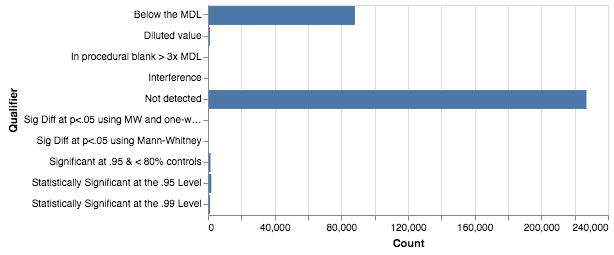

In [21]:
temp = (pollutants
        .qualifier
        .value_counts())
temp = pd.DataFrame(temp).reset_index()
temp.columns = ["Qualifier", "Count"]

alt.Chart(temp).mark_bar().encode(
    x='Count',
    y='Qualifier',
)

<a id="poll_result"></a>

### [^](#toc) Result

Before we can exlpore the result we should look at the units its in.

Let's group by the different orgagisms and see the average measurement value for each of the units present

A few of these units can be grouped together

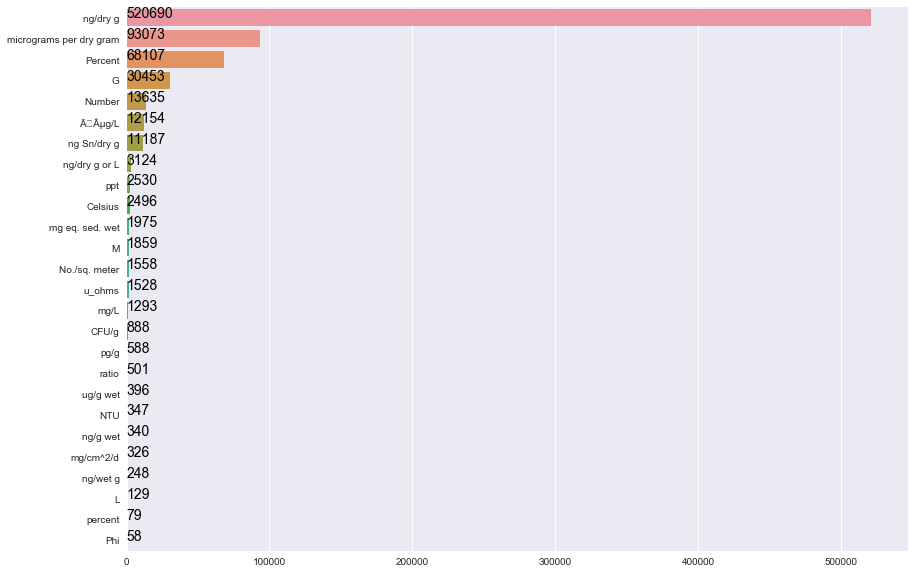

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
pretty_bar(pollutants.units.value_counts(), ax)

### Group measurement units

In [ ]:
{"ng/g wet", "ng/wet g", 'ug/g wet'}

{"ng/dry g", "micrograms per dry gram", 'ng/dry g or L'}

{"ÃÂµg/L", 'Ã\x82Âµg/L', 'mg/L'}

good = {"Percent", "Number", 'Phi', 'Celsius', 'percent', 'No./sq. meter', 'ratio', 'L'}

unsure = {'NTU', "G", 'M', 'u_ohms', 'ppt', 'CFU/g', 'mg eq. sed. wet', 'ng Sn/dry g','pg/g', 'mg/cm^2/d'} 

<a name="sites"></a>

# [^](#toc) <u>Sites</u>

A lot of these columns we've seen in the pollants data

In [77]:
sites = pd.read_csv(DATA_PATH + "sites.csv")
print("Shape of site data: {}{}{}".format(color.BOLD, sites.shape, color.END))

# This feature has a lot of missing values and isn't explained
sites.drop("reg_nm", axis=1, inplace=True)

num_cols = [col for col in sites.columns if sites[col].dtype != object]
cat_cols = [col for col in sites.columns if sites[col].dtype == object]

print("\n{}Numeric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_cols))

print("\n{}Categoric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_cols))

sites.head()

Shape of site data: (4107, 12)

Numeric columns:
latitude --- longitude

Categoric columns:
coastal_ecological_area --- general_location --- nst_site --- region_name --- source_file --- specific_location --- state_name --- stratum --- study_name


coastal_ecological_area general_location  latitude  longitude    nst_site  \
0            Alaskan West      Chukchi Sea   69.8383  -163.8096  AKC10-0001   
1            Alaskan West      Chukchi Sea   69.4069  -165.4180  AKC10-0002   
2            Alaskan West      Chukchi Sea   69.1504  -164.8480  AKC10-0003   
3            Alaskan West      Chukchi Sea   68.9944  -167.3424  AKC10-0004   
4            Alaskan West      Chukchi Sea   69.6116  -163.7207  AKC10-0005   

  region_name                  source_file specific_location state_name  \
0         NaN  Sites_AlaskaArcticStudy.csv           Unknown     Alaska   
1         NaN  Sites_AlaskaArcticStudy.csv           Unknown     Alaska   
2         NaN  Sites_AlaskaArcticStudy.csv           Unknown     Alaska   
3         NaN  Sites_AlaskaArcticStudy.csv           Unknown     Alaska   
4         NaN  Sites_AlaskaArcticStudy.csv           Unknown     Alaska   

  stratum           study_name  
0     NaN  Alaska Arctic Study  
1     NaN  Alaska Arctic Study  
2     NaN  Alaska Arctic Study  
3     NaN  Alaska Arctic Study  
4     NaN  Alaska Arctic Study

<a id="site_nan"></a>

### [^](#toc) Missing data

In [127]:
missing_cols = sites.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].index

temp = pd.DataFrame(sites[missing_cols].isnull().sum()).reset_index()
temp.columns = ["Feature", "Amount missing"]

temp

Feature  Amount missing
0   general_location              37
1             reg_nm            3932
2        region_name             175
3  specific_location              95
4            stratum            2244

### stratum

Some studies were split into stratified random samples in order to ensure that each subpopulation was sampled appropriately.

Where available, this field defines the stratum for a given location.

In [78]:
sites.stratum.value_counts()

STR_01_91    39
STR_NA       30
STR_03_92    27
SP1_S1       27
SP1_S2       27
SP1_S3       27
SP1_S4       27
STR_05       26
CAE_36       25
STR_01       24
STR_04       23
STR_03       22
STR_02       22
STR_13       22
STR_01_92    21
South 3      21
STR_JS       21
South 1      20
STR_11       20
STR_10       19
STR_02_91    18
CAE_34       18
North 2      18
North 3      17
STR_14       17
STR_15       17
STR_12       17
STR_07       16
West         16
East         16
             ..
C3            1
B2            1
(B)D2         1
B3            1
STR_6_3       1
(B)P          1
C4            1
B4            1
B6            1
(B)F1         1
(B)E3         1
G-7           1
(B)E1         1
(B)F2         1
C5            1
STR_8_14      1
STR_0BF       1
STR_BD        1
G1            1
(B)A2         1
(B)C2         1
C1            1
(B)A3         1
(B)A1         1
G2            1
(B)D1         1
(B)B1         1
(B)B2         1
STR_BB        1
F-1           1
Name: stratum, Length: 3

<a id="sites_study_name"></a>

### [^](#toc) Study Name

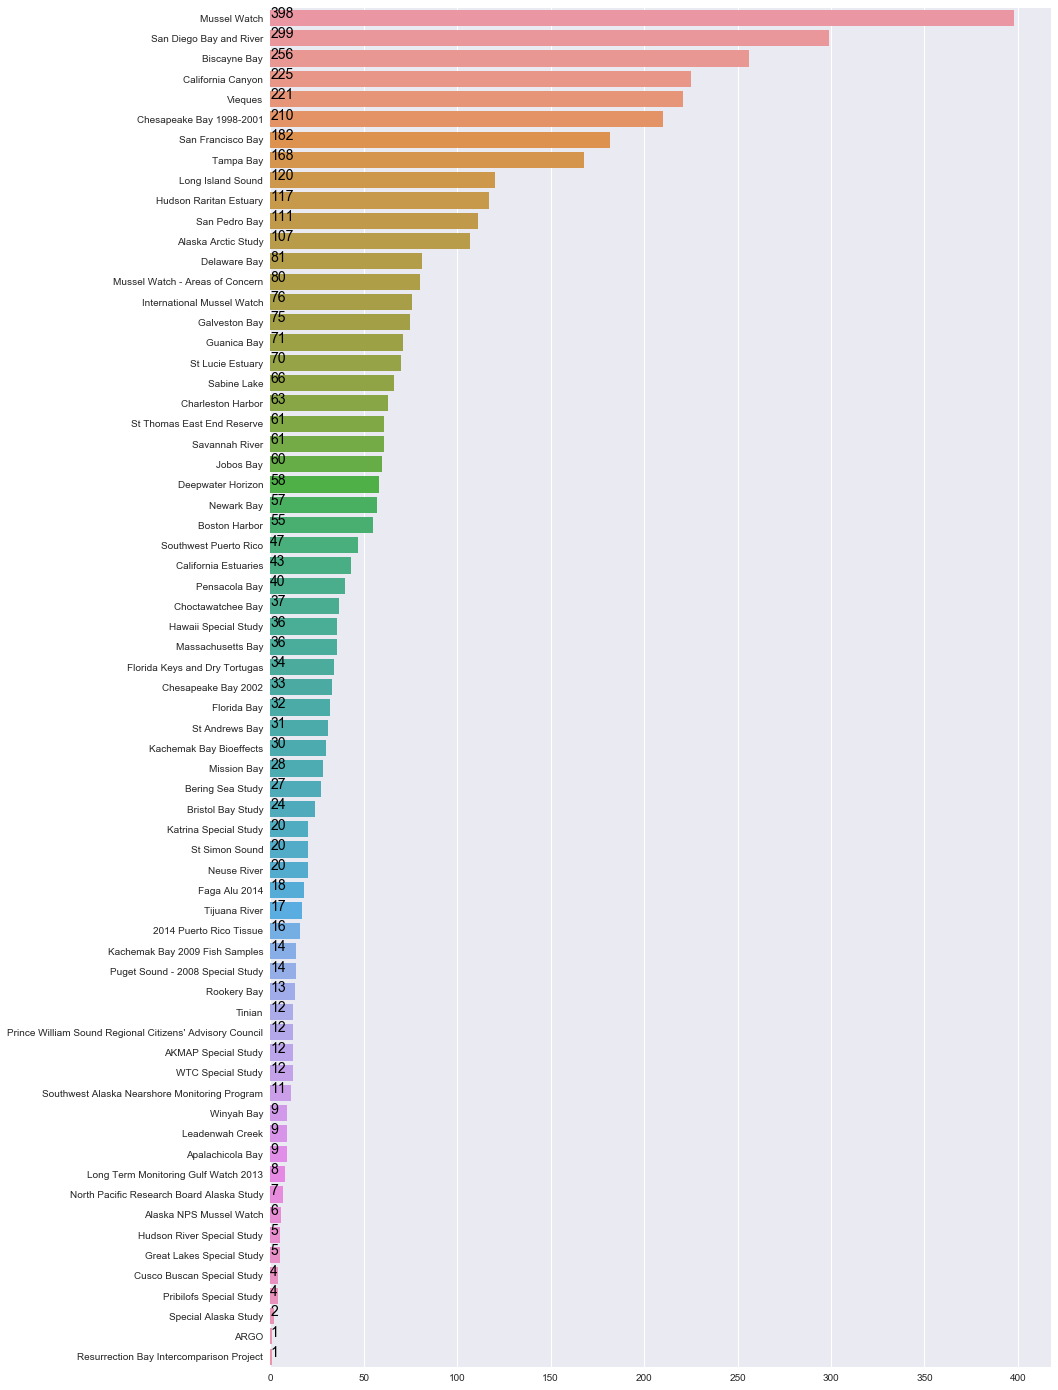

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(14, 25))
temp = sites.study_name.value_counts()
pretty_bar(temp, ax)

<a id="site_source_file"></a>

### [^](#toc) Source File

FIXME: a lot of information can be gotten from the file names.  There should be a regex to make the file names more human readable (camel case --> normal format)

In [ ]:
# sites.source_file.map(lambda x.value_counts()

### Location

coastal_ecological_area, general_location, region_name, specific_location

<a id="site_nst"></a>

### [^](#toc) NST Site

NOTE: only 1/4 of the sites are shown.  This plot is graphics heavy and is exceding the data limit of markers

In [25]:
# Too many markers excedes the data limit
# FIXME: The data limit on Kaggle Kernels is probably different
NUM_MARKERS = 1000

m = folium.Map(location=[60, -125], zoom_start=3)
marker_cluster = MarkerCluster().add_to(m)

for lat, lon, nst_site in sites[["latitude", "longitude", "nst_site"]].values:    
    folium.Marker(
        location = [lat, lon],
        popup = nst_site,
        icon = folium.Icon(color='green', icon='ok-sign'),
    ).add_to(marker_cluster)
    
    if NUM_MARKERS == 1:
        break
    NUM_MARKERS -= 1

m

<a id="site_gen_loc"></a>

### [^](#toc) General Location

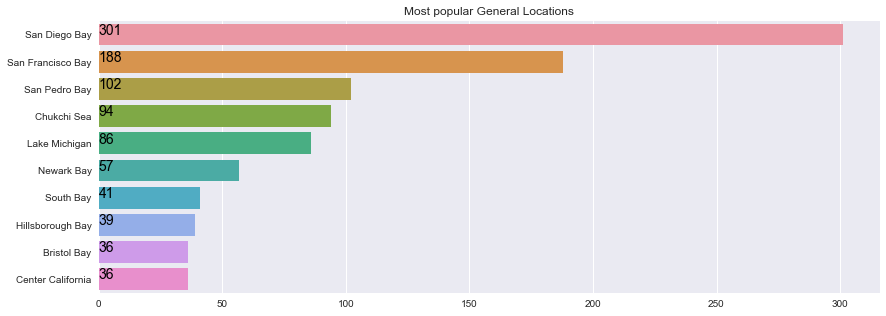

In [5]:
temp = (sites
        .groupby("state_name")
        .general_location
        .value_counts()
        .head(12)
        .rename(columns={"general_location": "Count"}))
temp = pd.DataFrame(temp).reset_index()
temp.columns = ["State", "Location", "Count"]

alt.Chart(temp).mark_bar().encode(
    x='Count',
    y='Location',
    color="State"
)

---
<a name="histopaths"></a>

# [^](#toc) <u>Histopaths</u>

There appears to be a lot of columns so let's figure out the important ones

In [187]:
histopaths = pd.read_csv(DATA_PATH + "histopaths.csv")
print("Shape of histopaths data: {}{}{}".format(color.BOLD, histopaths.shape, color.END))

Shape of histopaths data: (1800, 79)


<a id="hist_process"></a>

### [^](#toc) Data Processsing

    
This dataset contains a lot of features that don't really contain any inforamtion, so I'll delete them

In [188]:
### Interestingly, there are several columns that are completely empty!
### These features are: 
cols = ["edema", "gonad_subsample_wet_weight", "hydra_gill",
        "nemertine_gill", "other_trematode_sporocyst_gill",
        "other_trematode_sporocyst_gut", "tumor"]

### In addition there are also many columns that only have 10 entries present!
### These features are:
cols.extend(["abnormality", "abnormality_description", "chlamydia", 
        "metacercaria", "pseudoklossia", 
        "rickettsia_digestive_tubule", "rickettsia_gut"])

### There are also some columns that are boring and contain only one unique value.
### These should be removed as well
cols.extend(["multinucleated_sphere_x",
             "pea_crab", "proctoeces", "neoplasm",
             "unusual_digestive_tubule", "unidentified_gonoduct_organism",
             "station_letter", "multinucleated_sphere_x_description",
             "focal_necrosis", "diffuse_necrosis"])

### Columns lacking information
cols.extend(["unidentified_organism", "focal_inflammation", 
             "diffuse_inflammation", "trematode_metacercariae_description", 
             "condition_code"])

histopaths = histopaths.drop(cols, axis=1)

<a id="hist_overview"></a>

### [^](#toc) Quick Overview

In [175]:
num_cols = [col for col in histopaths.columns if histopaths[col].dtype != object]
cat_cols = [col for col in histopaths.columns if histopaths[col].dtype == object]

print("\n{}Numeric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_cols))

print("\n{}Categoric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_cols))

histopaths.head()


Numeric columns:
bucephalus --- ceroid --- cestode_body --- cestode_gill --- cestode_mantle --- ciliate_digestive_tract --- ciliate_gut --- ciliate_small_gill --- condition_code --- copepod_body --- copepod_gill --- copepod_gut_digestive_tubule --- dermo_numerical_value --- digestive_tubule_atrophy --- empty_displacement_volume --- fiscal_year --- full_displacement_volume --- latitude --- length --- longitude --- nematode --- nematopsis_body --- nematopsis_gill --- nematopsis_mantle --- protozoan_digestive_tubule --- protozoan_gut --- sample_number --- trematode_metacercariae --- wet_weight --- xenoma

Categoric columns:
coastal_ecological_area --- condition_code_description --- dermo --- dermo_description --- dermo_infection_intensity --- digestive_tubule_atrophy_description --- general_location --- gonadal_index --- gonadal_index_description --- nst_sample_id --- nst_site --- region --- sample_letter --- sex --- source_file --- species_name --- specific_location --- specific_region 

bucephalus  ceroid  cestode_body  cestode_gill  cestode_mantle  \
0         0.0     0.0           NaN           NaN             NaN   
1         0.0     0.0           NaN           NaN             NaN   
2         0.0     0.0           NaN           NaN             NaN   
3         0.0     0.0           NaN           NaN             NaN   
4         0.0     0.0           NaN           NaN             NaN   

   ciliate_digestive_tract  ciliate_gut  ciliate_small_gill  \
0                      0.0          0.0                 0.0   
1                      0.0          0.0                 0.0   
2                      0.0          0.0                 7.0   
3                      0.0          0.0                 0.0   
4                      0.0          0.0                 0.0   

             coastal_ecological_area  condition_code  \
0  Alaska South Central - Cook Inlet             NaN   
1  Alaska South Central - Cook Inlet             NaN   
2  Alaska South Central - Cook Inlet             NaN   
3  Alaska South Central - Cook Inlet             NaN   
4  Alaska South Central - Cook Inlet             NaN   

  condition_code_description  copepod_body  copepod_gill  \
0                        NaN           0.0           0.0   
1                        NaN           0.0           0.0   
2                        NaN           0.0           0.0   
3                        NaN           0.0           0.0   
4                        NaN           0.0           0.0   

   copepod_gut_digestive_tubule dermo dermo_description  \
0                           0.0   NaN               NaN   
1                           0.0   NaN               NaN   
2                           0.0   NaN               NaN   
3                           0.0   NaN               NaN   
4                           0.0   NaN               NaN   

  dermo_infection_intensity  dermo_numerical_value  digestive_tubule_atrophy  \
0                       NaN                    NaN                       1.0   
1                       NaN                    NaN                       1.0   
2                       NaN                    NaN                       2.0   
3                       NaN                    NaN                       1.0   
4                       NaN                    NaN                       2.0   

                digestive_tubule_atrophy_description  \
0  Average wall thickness less than normal but gr...   
1  Average wall thickness less than normal but gr...   
2  Wall thickness averaging about one-half as thi...   
3  Average wall thickness less than normal but gr...   
4  Wall thickness averaging about one-half as thi...   

   empty_displacement_volume  fiscal_year  full_displacement_volume  \
0                        NaN         2009                       NaN   
1                        NaN         2009                       NaN   
2                        NaN         2009                       NaN   
3                        NaN         2009                       NaN   
4                        NaN         2009                       NaN   

  general_location gonadal_index gonadal_index_description  latitude  length  \
0       Cook Inlet            S3    Gonad about half empty  59.20715     3.9   
1       Cook Inlet            S3    Gonad about half empty  59.20715     3.6   
2       Cook Inlet            R0                  Inactive  59.20715     3.7   
3       Cook Inlet            R0                  Inactive  59.20715     3.5   
4       Cook Inlet            S3    Gonad about half empty  59.20715     3.4   

   longitude  nematode  nematopsis_body  nematopsis_gill  nematopsis_mantle  \
0   -151.815       NaN              0.0              0.0                0.0   
1   -151.815       NaN              0.0              0.0                0.0   
2   -151.815       NaN              0.0              0.0                0.0   
3   -151.815       NaN              0.0              0.0                0.0   
4   -151.815       NaN             

<a id="hist_nan"></a>

### [^](#toc) Missing values

In [24]:
missing_cols = histopaths.isnull().sum()
missing_cols = histopaths[missing_cols[missing_cols > 0].index].isnull().sum()
missing_cols = missing_cols.reset_index()
missing_cols.columns = ["Column", "Num missing"]

missing_cols

Column  Num missing
0                             bucephalus         1382
1                                 ceroid          467
2                           cestode_body         1392
3                           cestode_gill         1392
4                         cestode_mantle         1392
5                ciliate_digestive_tract         1382
6                            ciliate_gut         1382
7                     ciliate_small_gill         1382
8                         condition_code          925
9             condition_code_description          925
10                          copepod_body         1382
11                          copepod_gill         1382
12          copepod_gut_digestive_tubule         1382
13                                 dermo          925
14                     dermo_description          925
15             dermo_infection_intensity          925
16                 dermo_numerical_value          925
17                  diffuse_inflammation          467
18                      diffuse_necrosis          467
19              digestive_tubule_atrophy          467
20  digestive_tubule_atrophy_description          467
21             empty_displacement_volume          925
22                    focal_inflammation         1382
23                        focal_necrosis          467
24              full_displacement_volume          925
25                         gonadal_index          467
26                              nematode          477
27                       nematopsis_body         1385
28                       nematopsis_gill         1384
29                     nematopsis_mantle         1382
30            protozoan_digestive_tubule         1392
31                         protozoan_gut         1392
32                         sample_letter          885
33                          species_name          885
34               trematode_metacercariae          467
35   trematode_metacercariae_description          468
36                 unidentified_organism          467
37                            wet_weight          320
38                                xenoma         1382

<a id="hist_gen_feats"></a>

### [^](#toc) General features

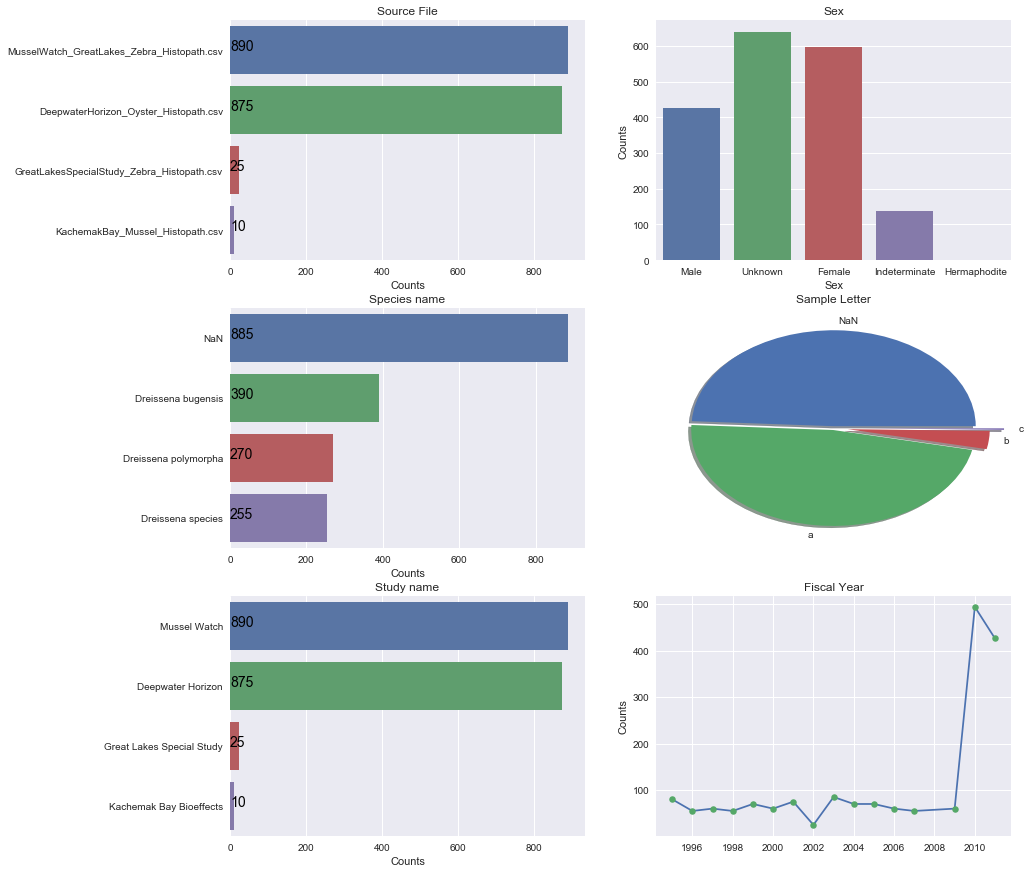

In [25]:
fig, axarr = plt.subplots(3, 2, figsize=(14, 15))

for col in ("source_file", "sex", "species_name",
            "sample_letter", "study_name"):
    histopaths[col].fillna("NaN", inplace=True)

### source_file
pretty_bar(histopaths.source_file.value_counts(), axarr[0][0],
           title="Source File", xlabel="Counts")

### sex
sns.countplot(histopaths.sex, ax=axarr[0][1]).set(title="Sex", xlabel="Sex", ylabel="Counts")

### species_name
pretty_bar(histopaths.species_name.value_counts(), axarr[1][0],
           title="Species name", xlabel="Counts")

### sample_letter
explode = [0.02, 0.02, 0.1, 0.2]
(histopaths.sample_letter
     .value_counts()
     .plot(kind="pie", ax=axarr[1][1], explode=explode, shadow=True)
     .set(ylabel="", title="Sample Letter"))

### study_name
pretty_bar(histopaths.study_name.value_counts(), axarr[2][0],
           title="Study name", xlabel="Counts")

axarr[2][1].plot(histopaths.fiscal_year.value_counts().sort_index())
axarr[2][1].plot(histopaths.fiscal_year.value_counts().sort_index(), ".", markersize=13)
axarr[2][1].set_title("Fiscal Year")
axarr[2][1].set_ylabel("Counts");

<a id="hist_loc"></a>

### [^](#toc) Location

#### Location Wordcloud

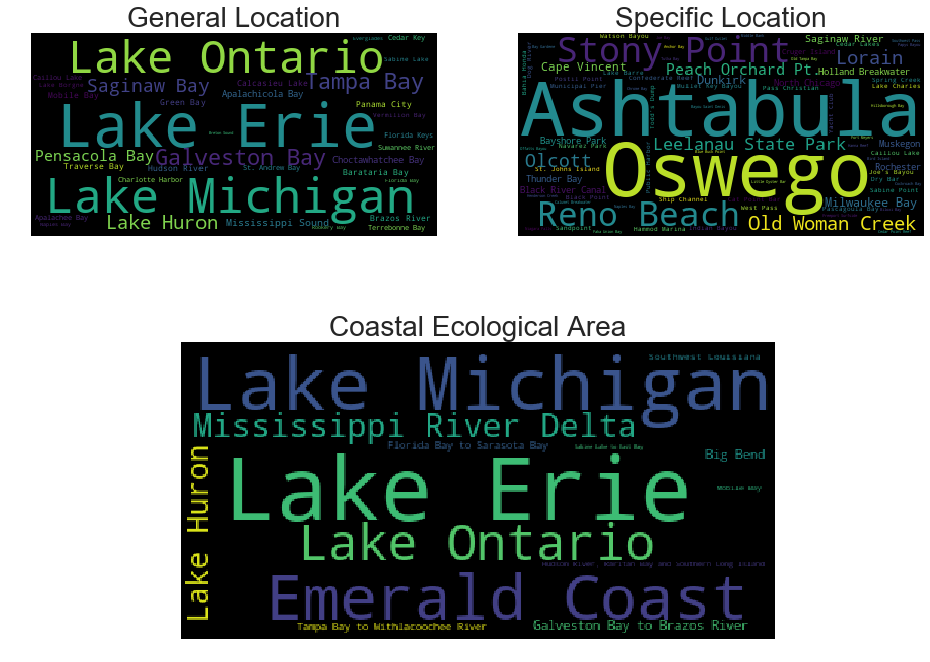

In [165]:
plt.figure(figsize=(16, 12))

### Nuanced way of creating subplots
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

for ax, col, title in [(ax1, "general_location",        "General Location"),
                       (ax2, "specific_location",       "Specific Location"),
                       (ax3, "coastal_ecological_area", "Coastal Ecological Area")]:
    text = histopaths[col].value_counts()
    
    wc = WordCloud().generate_from_frequencies(text)
    ax.imshow(wc)
    ax.axis('off')
    ax.set_title(title, fontsize=28)

#### Most popular regions

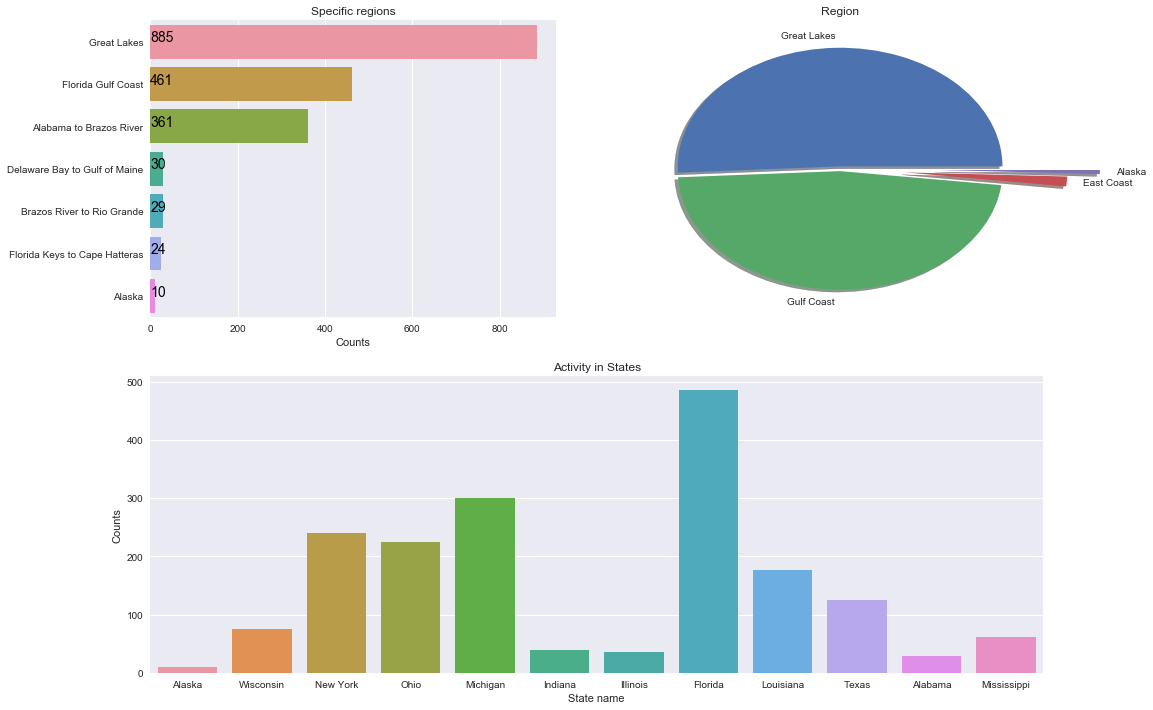

In [104]:
plt.figure(figsize=(16, 12))

### Nuanced way of creating subplots
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

### specific_region
pretty_bar(histopaths.specific_region.value_counts(), ax1,
           xlabel="Counts", title="Specific regions")

### region
explode = [0.02, 0.02, 0.4, 0.6]
(histopaths.region
 .value_counts()
 .plot(kind="pie", ax=ax2, explode=explode, shadow=True)
 .set(ylabel="", title="Region"))

### state_name
(sns.countplot(histopaths.state_name, ax=ax3)
    .set(title="Activity in States", xlabel="State name", ylabel="Counts"));

<a id="hist_nst_site"></a>

### [^](#toc) Map of sites

Shown are all the NST Sites.  The dataset defines these as: "a character code that defines the NS&T sampling site name. Codes are generally defined by the site's general and specific location."

In [80]:
# Too many markers excedes the data limit
# FIXME: The data limit on Kaggle Kernels is probably different
NUM_MARKERS = 1000

m = folium.Map(location=[60, -125], zoom_start=3)
marker_cluster = MarkerCluster().add_to(m)

for lat, lon, nst_site in histopaths[["latitude", "longitude", "nst_site"]].values:    
    folium.Marker(
        location = [lat, lon],
        popup = nst_site,
        icon = folium.Icon(color='green', icon='ok-sign'),
    ).add_to(marker_cluster)
    
    if NUM_MARKERS == 1:
        break
    NUM_MARKERS -= 1

m

<a id="hist_gonadal"></a>

### [^](#toc) Gonadal

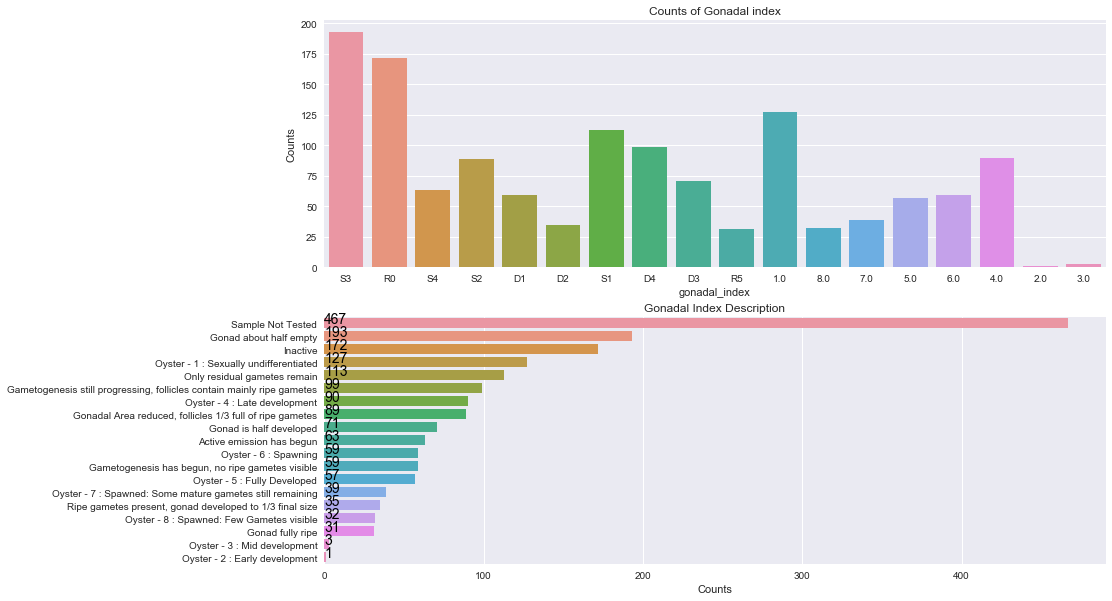

In [84]:
fig, axarr = plt.subplots(2, 1, figsize=(14, 10))

### dermo
(sns.countplot(histopaths.gonadal_index, ax=axarr[0])
     .set(title="Counts of Gonadal index", ylabel="Counts"))

### dermo_description
pretty_bar(histopaths.gonadal_index_description.value_counts(), axarr[1],
           title="Gonadal Index Description", xlabel="Counts")

<a id="hist_dermo"></a>

### [^](#toc) Dermo

FIXME: add "dermo_numerical_value"

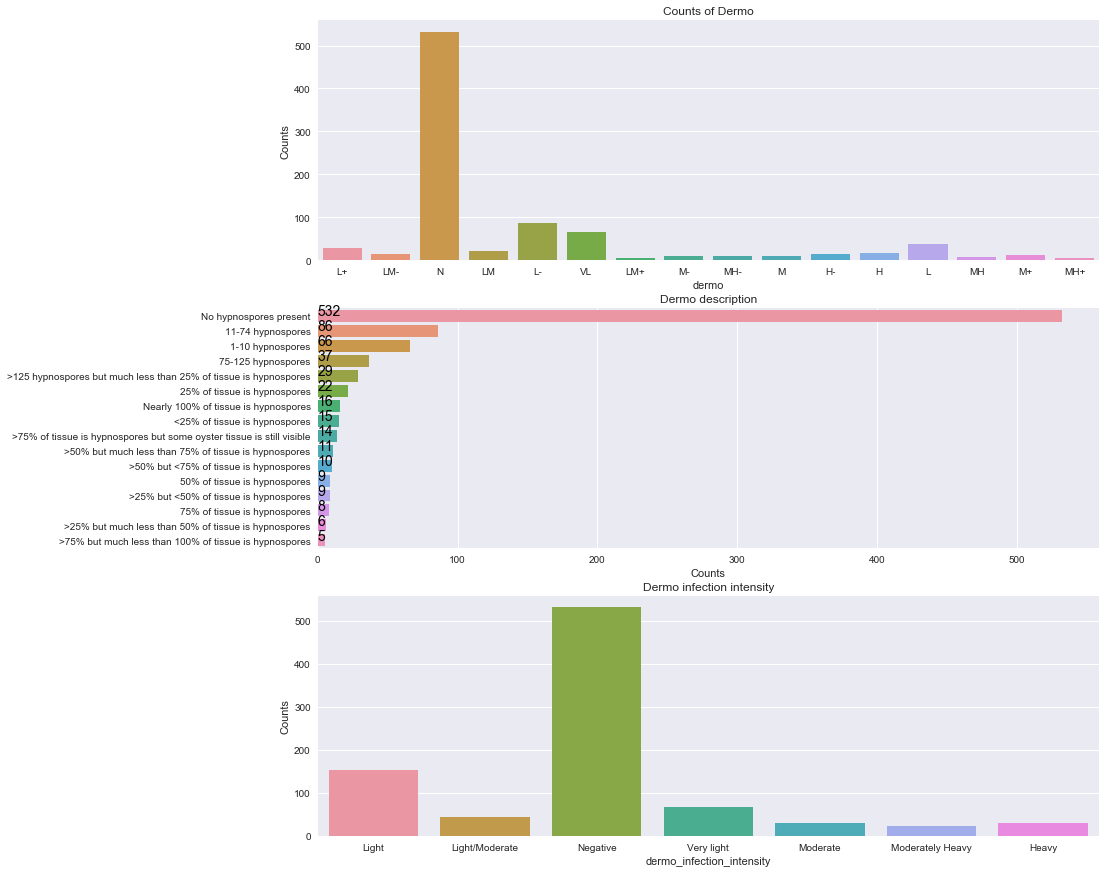

In [163]:
fig, axarr = plt.subplots(3, 1, figsize=(14, 15))

### dermo
(sns.countplot(histopaths.dermo, ax=axarr[0])
     .set(title="Counts of Dermo", ylabel="Counts"))

### dermo_description
pretty_bar(histopaths.dermo_description.value_counts(), axarr[1],
           title="Dermo description", xlabel="Counts")


### dermo_infection_intensity
(sns.countplot(histopaths.dermo_infection_intensity, ax=axarr[2])
     .set(title="Dermo infection intensity", ylabel="Counts"));

### Subject description

The observer is looking at both the Condition Code and the Digestive Tubule Atrophy

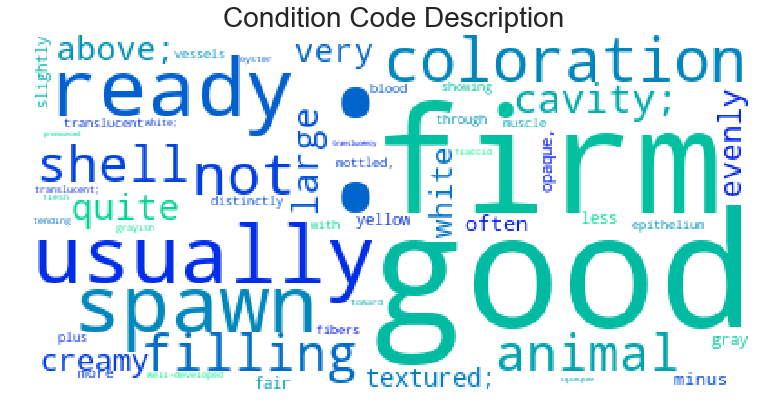

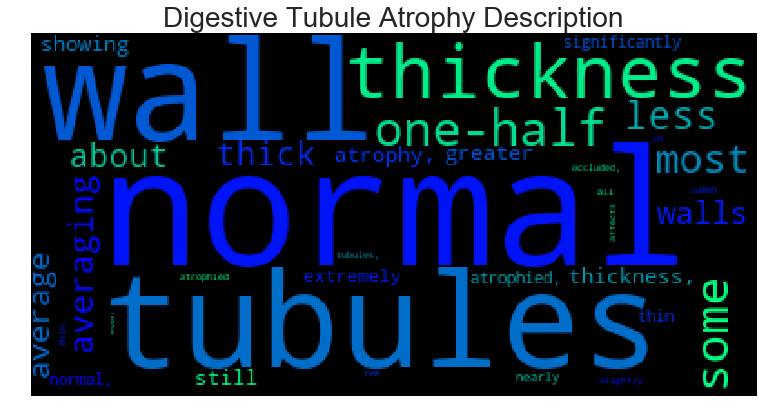

In [178]:
def remove_stopwords(text, stopwords):
    for word in stopwords:
        text = text.replace(" " + word + " ", " ")
    return text

stopwords = ["and", "but", "to", "or", "as", "the", "then", "than", "of"]

### condition_code_description
histopaths['condition_code_description'].fillna("", inplace=True)
text = " ".join(histopaths['condition_code_description']).lower()
text = remove_stopwords(text, stopwords)
freq = Counter(text.split())
wc = WordCloud(colormap='winter_r', background_color='White').generate_from_frequencies(freq)
plt.figure(figsize=(13,13))
plt.imshow(wc)
plt.axis('off')
plt.title('Condition Code Description', fontsize=28)

### digestive_tubule_atrophy_description
histopaths['digestive_tubule_atrophy_description'].fillna("", inplace=True)
text = " ".join(histopaths['digestive_tubule_atrophy_description']).lower()
text = remove_stopwords(text, stopwords)
freq = Counter(text.split())
wc = WordCloud(colormap='winter_r', background_color='Black').generate_from_frequencies(freq)
plt.figure(figsize=(13,13))
plt.imshow(wc)
plt.axis('off')
plt.title('Digestive Tubule Atrophy Description', fontsize=28);

<a id="hist_corr"></a>

### [^](#toc) Correlation plot

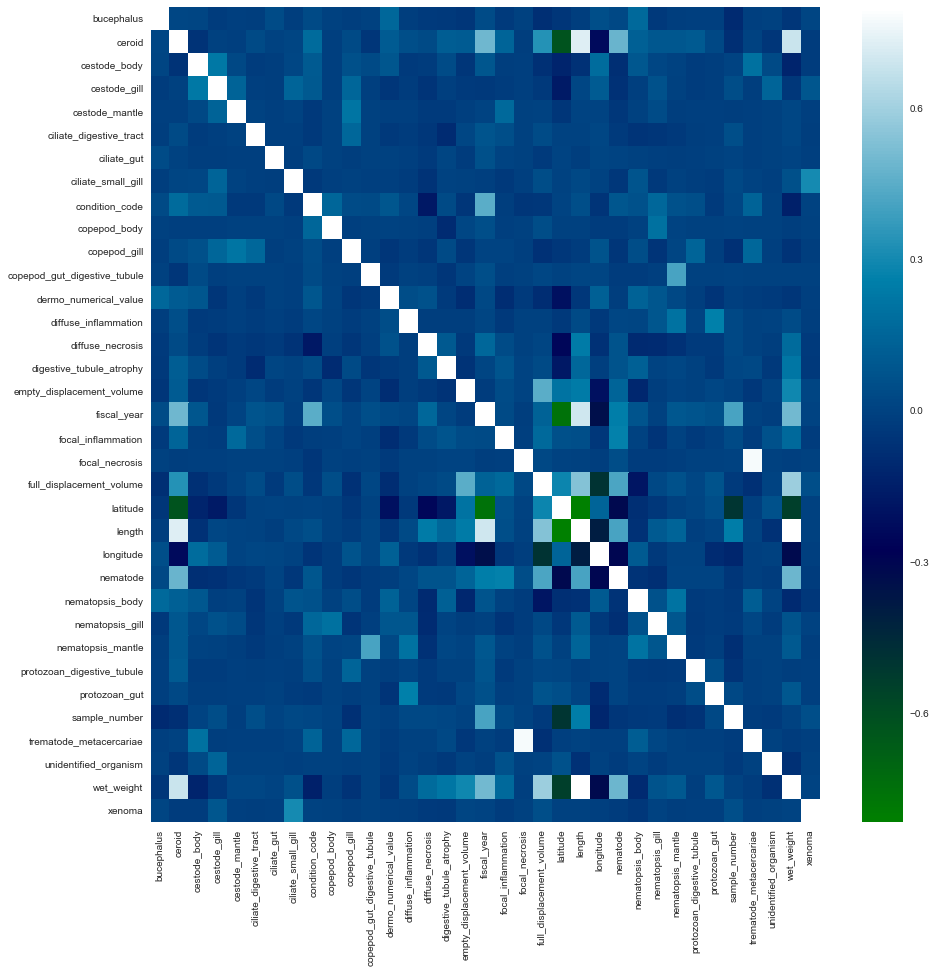

In [71]:
f, ax = plt.subplots(figsize=(15, 15))

_ = sns.heatmap(histopaths.corr(), vmax=.8, cmap="ocean")

### Numerical columns

cestode_body --- cestode_gill --- cestode_mantle --- digestive_tubule_atrophy --- nematode --- nematopsis_body --- nematopsis_gill --- nematopsis_mantle --- protozoan_digestive_tubule --- protozoan_gut  trematode_metacercariae  --- xenoma

bucephalus

In [181]:
histopaths[histopaths.bucephalus > 0]

bucephalus  ceroid  cestode_body  cestode_gill  cestode_mantle  \
1076         2.0   160.0           1.0           0.0             0.0   
1077         2.0   300.0           1.0           0.0             0.0   
1105         1.0   923.0           0.0           0.0             0.0   
1107         1.0    25.0           0.0           0.0             0.0   
1263         2.0   230.0           0.0           0.0             0.0   
1278         3.0   170.0           0.0           0.0             0.0   

      ciliate_digestive_tract  ciliate_gut  ciliate_small_gill  \
1076                      0.0          0.0                 0.0   
1077                      0.0          0.0                 1.0   
1105                      0.0          3.0                 1.0   
1107                      0.0          0.0                 0.0   
1263                      0.0          0.0                 0.0   
1278                      0.0          0.0                 0.0   

               coastal_ecological_area  condition_code  \
1076       Florida Bay to Sarasota Bay             2.0   
1077       Florida Bay to Sarasota Bay             1.0   
1105     Galveston Bay to Brazos River             5.0   
1107     Galveston Bay to Brazos River             2.0   
1263                          Big Bend             3.0   
1278  Tampa Bay to Withlacoochee River             3.0   

                             condition_code_description  copepod_body  \
1076  Good : Not quite as firm or large as above; us...           0.0   
1077  Very Good : Animal firm and filling shell cavi...           0.0   
1105  Fair : Oyster well-developed but not opaque or...           0.0   
1107  Good : Not quite as firm or large as above; us...           0.0   
1263  Good Minus : Coloration less opaque, often sli...           0.0   
1278  Good Minus : Coloration less opaque, often sli...           0.0   

      copepod_gill  copepod_gut_digestive_tubule dermo  \
1076           0.0                           0.0    L-   
1077           0.0                           0.0   LM-   
1105           0.0                           0.0    H-   
1107           0.0                           0.0     N   
1263           0.0                           0.0     N   
1278           0.0                           0.0     H   

                                      dermo_description  \
1076                                  11-74 hypnospores   
1077                      <25% of tissue is hypnospores   
1105  >75% of tissue is hypnospores but some oyster ...   
1107                             No hypnospores present   
1263                             No hypnospores present   
1278               Nearly 100% of tissue is hypnospores   

     dermo_infection_intensity  dermo_numerical_value  \
1076                     Light                   0.67   
1077            Light/Moderate                   1.66   
1105                     Heavy                   4.67   
1107                  Negative                   0.00   
1263                  Negative                   0.00   
1278                     Heavy                   5.00   

      digestive_tubule_atrophy  \
1076                       2.0   
1077                       1.0   
1105                       2.0   
1107                       1.0   
1263                       2.0   
1278                       2.0   

                   digestive_tubule_atrophy_description  \
1076  Wall thickness averaging about one-half as thi...   
1077  Average wall thickness less than normal but gr...   
1105  Wall thickness averaging about one-half as thi...   
1107  Average wall thickness less than normal but gr...   
1263  Wall thickness averaging about one-half as thi...   
1278  Wall thickness averaging about one-half as thi...   

      empty_displacement_volume  fiscal_year  full_displacement_volume  \
1076                      260.0         2010                     360.0   
1077                      260.0         2010                     360.0   
1105                   

### Ciliate

In [ ]:
ciliate_large_gill
ciliate_digestive_tract
ciliate_gut
ciliate_small_gill

### Copepod



Here's what the little guy looks like

<img alt="Copepod" style="width:300px; float:left" src="https://cdn.britannica.com/700x450/20/12720-004-3F05363F.jpg"/>

In [186]:
# histopaths.copepod_body.value_counts()
# histopaths.copepod_body.value_counts()
histopaths.copepod_gut_digestive_tubule.value_counts()
# copepod_gill
# copepod_gut_digestive_tubule

0.0    417
1.0      1
Name: copepod_gut_digestive_tubule, dtype: int64

### Ceriod

The ceriod is listed as "Distinct brown - yellow aggregates that may occur in large clumps, and appear to be involvedin metabolite accumulation and detoxification" [[5](#5)].

This feature measures the number of ceriod bodies found on the bivalve

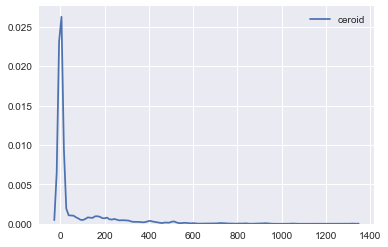

In [183]:
sns.kdeplot(histopaths.ceroid);

### Volume

As we can see from the r value, the relationship is nearly linear.  From the plot you will notice an outlier (it's actually 12 points with the same value).  These outliers all have the same nst_sample_id.  I'm guessing this id can be sourced to one person who perhaps was misinformed.

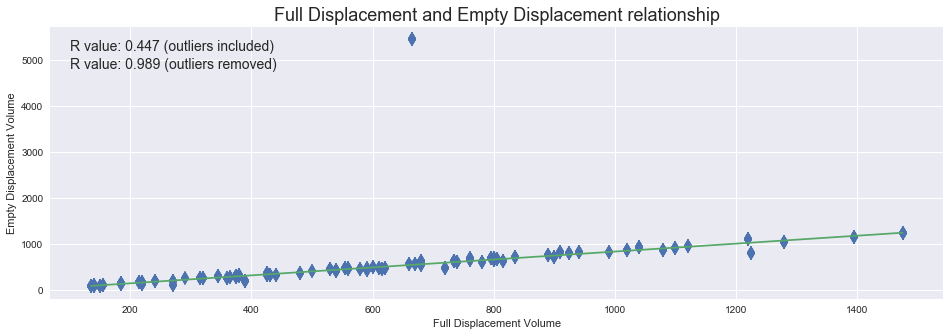

In [66]:
from scipy.stats import linregress

plt.figure(figsize=(16, 5))
plt.title("Full Displacement and Empty Displacement relationship", fontsize=18)
plt.xlabel("Full Displacement Volume")
plt.ylabel("Empty Displacement Volume")

### Actual data
temp1 = histopaths[(histopaths.full_displacement_volume.notnull()) & (histopaths.empty_displacement_volume.notnull())]
x1 = temp1["full_displacement_volume"]
y1 = temp1["empty_displacement_volume"]
plt.plot(x1, y1, "d", markersize=10)

### r2 value with outliers
slope, intercept, r_value, _, _ = linregress(x1, y1)
plt.text(100, 5200, s="R value: {} (outliers included)".format(int(r_value*1000)/1000), fontsize=14)

### removing outliers
temp2 = temp1[temp1.empty_displacement_volume < 5000]
x1 = temp2["full_displacement_volume"]
y1 = temp2["empty_displacement_volume"]

### Fit line and new r2 value
slope, intercept, r_value, _, _ = linregress(x1, y1)
x2 = np.linspace(min(x1[x1.notnull()]), max(x1[x1.notnull()]), 2)
y2 = [slope * x2[0] + intercept, slope * x2[1] + intercept]
plt.plot(x2, y2)
plt.text(100, 4800, s="R value: {} (outliers removed)".format(int(r_value*1000)/1000), fontsize=14)

del x1, x2, y1, y2, temp1, temp2, slope, intercept, r_value

In [18]:
print(histopaths[histopaths.empty_displacement_volume > 5000].nst_sample_id.value_counts())
histopaths[histopaths.empty_displacement_volume > 5000]

SS2010PBPH1CV    12
Name: nst_sample_id, dtype: int64


bucephalus  ceroid  cestode_body  cestode_gill  cestode_mantle  \
1208         0.0   210.0           0.0           0.0             0.0   
1209         0.0   130.0           0.0           0.0             0.0   
1210         0.0    70.0           0.0           0.0             0.0   
1211         0.0    50.0           0.0           0.0             0.0   
1212         0.0   210.0           0.0           0.0             0.0   
1639         NaN     NaN           NaN           NaN             NaN   
1640         NaN     NaN           NaN           NaN             NaN   
1641         NaN     NaN           NaN           NaN             NaN   
1642         NaN     NaN           NaN           NaN             NaN   
1643         NaN     NaN           NaN           NaN             NaN   
1644         NaN     NaN           NaN           NaN             NaN   
1645         NaN     NaN           NaN           NaN             NaN   

      ciliate_digestive_tract  ciliate_gut  ciliate_small_gill  \
1208                      0.0          0.0                 0.0   
1209                      0.0          0.0                 0.0   
1210                      0.0          0.0                 0.0   
1211                      0.0          0.0                 0.0   
1212                      1.0          0.0                 0.0   
1639                      NaN          NaN                 NaN   
1640                      NaN          NaN                 NaN   
1641                      NaN          NaN                 NaN   
1642                      NaN          NaN                 NaN   
1643                      NaN          NaN                 NaN   
1644                      NaN          NaN                 NaN   
1645                      NaN          NaN                 NaN   

     coastal_ecological_area  condition_code  \
1208           Emerald Coast             2.0   
1209           Emerald Coast             2.0   
1210           Emerald Coast             1.0   
1211           Emerald Coast             1.0   
1212           Emerald Coast             2.0   
1639           Emerald Coast             1.0   
1640           Emerald Coast             2.0   
1641           Emerald Coast             2.0   
1642           Emerald Coast             1.0   
1643           Emerald Coast             2.0   
1644           Emerald Coast             2.0   
1645           Emerald Coast             2.0   

                             condition_code_description  copepod_body  \
1208  Good : Not quite as firm or large as above; us...           0.0   
1209  Good : Not quite as firm or large as above; us...           0.0   
1210  Very Good : Animal firm and filling shell cavi...           0.0   
1211  Very Good : Animal firm and filling shell cavi...           0.0   
1212  Good : Not quite as firm or large as above; us...           0.0   
1639  Very Good : Animal firm and filling shell cavi...           NaN   
1640  Good : Not quite as firm or large as above; us...           NaN   
1641  Good : Not quite as firm or large as above; us...           NaN   
1642  Very Good : Animal firm and filling shell cavi...           NaN   
1643  Good : Not quite as firm or large as above; us...           NaN   
1644  Good : Not quite as firm or large as above; us...           NaN   
1645  Good : Not quite as firm or large as above; us...           NaN   

      copepod_gill  copepod_gut_digestive_tubule dermo  \
1208           0.0                           0.0     L   
1209           0.0                           0.0     N   
1210           0.0                           0.0     N   
1211           0.0                           0.0     N   
1212           0.0                           0.0     N   
1639           NaN                           NaN     N   
1640           NaN                           NaN     N   
1641           NaN                           NaN     N   
1642           NaN                           NaN     N   
1643           NaN                           NaN     N 

<a id="hist_size"></a>

### [^](#toc) Size

The units aren't defined anywhere, however I believe Length is in inches (2.54cm) and Wet Wight is in ounces (28.35g) based on the dimensions of the quagga mussel [[6](#6)] and zebra mussel [[7](#7)].

A few things to note:
- The relatioship between width and length looks approximately cubric
- The smallest bivalves are from the Great Lakes.  I imagine this is because rivers and the ocean have more oxygen than a still lake and can thus support bigger organisms
- "Alabama to Branzos River" has the biggest spread and heaviest organisms
- "Florida Gulf Coast" has a simliar distribution to "Florida Keys to Cape Hatteras"

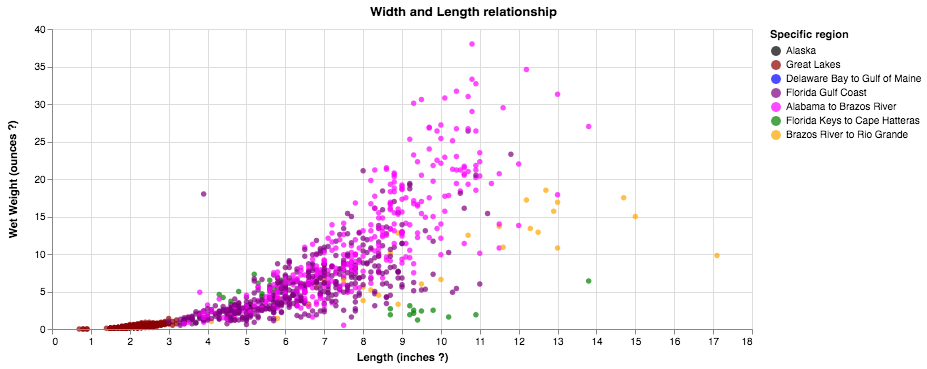

In [162]:
import altair as alt

temp = histopaths[["length", "wet_weight", "specific_region"]]
temp.columns = ["Length (inches ?)", "Wet Weight (ounces ?)", "Specific region"]

click = alt.selection_multi(fields=['Specific region'])
palette = alt.Scale(domain=['Alaska', 'Great Lakes', 'Delaware Bay to Gulf of Maine',
                           'Florida Gulf Coast', 'Alabama to Brazos River',
                           'Florida Keys to Cape Hatteras', 'Brazos River to Rio Grande'],
                  range=['black', 'darkred', 'blue', "purple", "magenta", "green", "orange"])

chart = alt.Chart(temp).mark_circle().encode(
    x='Length (inches ?)',
    y='Wet Weight (ounces ?)',
    opacity=alt.value(0.7),
    color=alt.condition(click,
                        'Specific region', alt.value('lightgray'), scale=palette)
).properties(selection=click, width=700, title="Width and Length relationship")

chart

<a id="references"></a>

# [^](#toc) <u>References</u>

<a id="1"></a>
[[1](https://www.kaggle.com/sohier/mussel-watch)] The Mussel Watch dataset hosted on Kaggle.  
<a id="2"></a>
[[2](https://products.coastalscience.noaa.gov/collections/ltmonitoring/nsandt/data2.aspx)] The full original data from NOAA's website.   
<a id="3"></a>
[[3](https://storage.googleapis.com/kaggle-datasets/2251/4287/Pollutants_Data_Dictionary.pdf?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1529789274&Signature=s4iUZazdL5JahAMiwekWxoejFeIXpM6z20O4MatauPnzwpxGI5waGuxp3x%2B1448LuCoVvuM2BWCW%2FFEBxny5COUoKKoZ%2FcH9ztr5T5BBZacj6Ql3vvLByARZdRfh%2BbIgBGCxNX5bl8TFNLh26fHA9TkMb6j55btdLlZoCAlYEPvhJ1OXn1Ul8%2BzoiOXOGle4huxreWqRwHL9W0dQqoC9xvyaLwBTnOGDYTsOGlu09hgr3ldDUZvqX0Mua%2BJWFuHgX5mev6GNiZvOU%2FmGhply90fSjNX4cWzyP85ICS5Lij5m1zEj75dYjbDGflWSsImqF0KHnPUMTC5ZoIJ2Y9FPOA%3D%3D)] Pollutants dataset feature dictionary  
<a id="4"></a>
[[4](https://storage.googleapis.com/kaggle-datasets/2251/4287/Sites_Data_Dictionary.pdf?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1529789336&Signature=kUS7FoYlUqxwkWwykdnRzLuQR2v4mq8HF6iBtAyJJXcz3vJBLMjmQchvJSYoltbDIEiNgP0KTq1o66kSSd7gB2gVSgqXrXPivF3Ycxyj7StXw394KBDmMTXGtgwi5mMdKT9664AQDR%2BHowts8iv1W2ftZHNkGXtA1nJLlNKKDAeVU9lJeIomz9UW1RxULuVtSSSEEEZmtONq0TYto4RKjWWkirggjDOfKsyoW3vHJVCN6cs%2BkNlBjMXDWjgDUu0zXco5VVZeJw7hPl5ey3ws8CzAF8c0SbqaGGPXhrQBZrZGknD31zFkH8k%2BMKWUs9lmFk%2F8rmMWXkuZOX5NskpptQ%3D%3D)] Sites dataset feature dictionary  
<a id="5"></a>
[[5](https://cdn.coastalscience.noaa.gov/datasets/nsandt/dictionaries/Histopath_Mussel_Data_Dictionary.pdf)] Histopaths dataset feature dictionary  
<a id="6"></a>
[[6](https://nas.er.usgs.gov/queries/factsheet.aspx?speciesid=95)] USGC page on the quagga mussel  
<a id="7"></a>
[[7](https://nas.er.usgs.gov/queries/FactSheet.aspx?speciesID=5)] USGC page on the zebra mussel

<a id="further_reading"></a>

# [^](#toc) <u>Further Reading</u>

- For a preview of the possible fate of corral reefs, see [this paper](https://link.springer.com/article/10.1007%2Fs00338-011-0839-y) from Elizabeth Crook in UC Santa Cruz
- Here's a [video](https://www.youtube.com/watch?v=6d9G_G2vP1Y) of the Wisconsin Mussel Watch program
- The Earth Institute has a nice article <u>[Can We Save Coral Reefs?](http://blogs.ei.columbia.edu/2015/08/17/can-we-save-coral-reefs/)</u> by Christine Evans.
- KOMO News from Seattle has a great [report](http://komonews.com/news/local/mussels-unlocking-secrets-to-whats-in-the-water) on a Mussel Watch

# What I do?

Taken from Colubia's website ([link](http://blogs.ei.columbia.edu/2011/06/13/losing-our-coral-reefs/)):

"""
Concerned individuals can become citizen scientists and monitor corals at restoration sites, or [volunteer](https://coralreef.noaa.gov/education/volunteer.html) to monitor marine sanctuaries, protect marine wildlife or clear ocean debris.  Everyone can help coral reefs by practicing sustainable fishing, and eating only sustainably caught fish. When vacationing near coral reefs, be careful not to touch them and don’t buy souvenirs of coral or other marine species.
"""

# Thank you!

This was a lot of fun to make!  I hope you learned a little more about Python's visualization tools and about mussels!